In [4]:
import anndata
import scanpy as sc
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Method Gene comparison

- Check how many commot came through with the breast tissues
- Liana wainting for the RCTD annotations
- Start cleaning the SpaDM genes

### Dataset import

In [5]:
#Commot
path_L1_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/breast_B1_1_dis500.h5ad"
path_L1_2_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/breast_B1_2_dis500.h5ad"
path_L2_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/breast_B2_1_dis500.h5ad"
path_L3_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/breast_B3_1_dis500.h5ad"
path_L4_1_dis500_commot = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/breast_B4_1_dis500.h5ad"

B1_1_dis500_commot = sc.read_h5ad(path_L1_1_dis500_commot)
B1_2_dis500_commot = sc.read_h5ad(path_L1_2_dis500_commot)
B2_1_dis500_commot = sc.read_h5ad(path_L2_1_dis500_commot)
B3_1_dis500_commot = sc.read_h5ad(path_L3_1_dis500_commot)
B4_1_dis500_commot = sc.read_h5ad(path_L4_1_dis500_commot)

#Cleaning the commot output
B1_1_dis500_commot_keys = list(B1_1_dis500_commot.obsp.keys())
B1_2_dis500_commot_keys = list(B1_2_dis500_commot.obsp.keys())
B2_1_dis500_commot_keys = list(B2_1_dis500_commot.obsp.keys())
B3_1_dis500_commot_keys = list(B2_1_dis500_commot.obsp.keys())
B4_1_dis500_commot_keys = list(B2_1_dis500_commot.obsp.keys())

B1_1_commot = [key[16:] for key in B1_1_dis500_commot_keys]
B1_2_commot = [key[16:] for key in B1_2_dis500_commot_keys]
B2_1_commot = [key[16:] for key in B2_1_dis500_commot_keys]
B3_1_commot = [key[16:] for key in B3_1_dis500_commot_keys]
B4_1_commot = [key[16:] for key in B4_1_dis500_commot_keys]

In [6]:
# SpatialDM
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/SpatialDM/breast_B1_1_sDM_top_G.csv"
B1_1_sDM = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/SpatialDM/breast_B1_2_sDM_top_G.csv"
B1_2_sDM = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/SpatialDM/breast_B2_1_sDM_top_G.csv"
B2_1_sDM = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/SpatialDM/breast_B3_1_sDM_top_G.csv"
B3_1_sDM = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/SpatialDM/breast_B4_1_sDM_top_G.csv"
B4_1_sDM = pd.read_csv(path)

#Selecting only significant genes in sDM 
t = B1_1_sDM['selected'].iloc[0]
B1_1_sDM = B1_1_sDM[B1_1_sDM['selected'] == t]
B1_2_sDM = B1_2_sDM[B1_2_sDM['selected'] == t]
B2_1_sDM = B2_1_sDM[B2_1_sDM['selected'] == t]
B3_1_sDM = B3_1_sDM[B3_1_sDM['selected'] == t]
B4_1_sDM = B4_1_sDM[B4_1_sDM['selected'] == t]

In [7]:
B1_1_sDM = B1_1_sDM.sort_values(by='z', ascending=False)
B1_2_sDM = B1_2_sDM.sort_values(by='z', ascending=False)
B2_1_sDM = B2_1_sDM.sort_values(by='z', ascending=False)
B3_1_sDM = B3_1_sDM.sort_values(by='z', ascending=False)
B4_1_sDM = B4_1_sDM.sort_values(by='z', ascending=False)

In [ ]:
B2_1_sDM

In [8]:
B1_1_sDM[['Ligand0', 'Receptor0']] = B1_1_sDM[['Ligand0', 'Receptor0']].fillna('')
B1_2_sDM[['Ligand0', 'Receptor0']] = B1_2_sDM[['Ligand0', 'Receptor0']].fillna('')
B2_1_sDM[['Ligand0', 'Receptor0']] = B2_1_sDM[['Ligand0', 'Receptor0']].fillna('')
B3_1_sDM[['Ligand0', 'Receptor0']] = B3_1_sDM[['Ligand0', 'Receptor0']].fillna('')
B4_1_sDM[['Ligand0', 'Receptor0']] = B4_1_sDM[['Ligand0', 'Receptor0']].fillna('')

B1_1_sDM = B1_1_sDM[['Ligand0', 'Receptor0']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B1_1_sDM = B1_1_sDM.tolist()

B1_2_sDM = B1_2_sDM[['Ligand0', 'Receptor0']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B1_2_sDM = B1_2_sDM.tolist()

B2_1_sDM = B2_1_sDM[['Ligand0', 'Receptor0']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B2_1_sDM = B2_1_sDM.tolist()

B3_1_sDM = B3_1_sDM[['Ligand0', 'Receptor0']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B3_1_sDM = B3_1_sDM.tolist()

B4_1_sDM = B4_1_sDM[['Ligand0', 'Receptor0']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B4_1_sDM = B4_1_sDM.tolist()

In [9]:
#Liana single cell
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Liana/breast_B1_1_liana_cellchatdb.csv"
B1_1_liana = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Liana/breast_B1_2_liana_cellchatdb.csv"
B1_2_liana = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Liana/breast_B2_1_liana_cellchatdb.csv"
B2_1_liana = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Liana/breast_B3_1_liana_cellchatdb.csv"
B3_1_liana = pd.read_csv(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Liana/breast_B4_1_liana_cellchatdb.csv"
B4_1_liana = pd.read_csv(path)

In [ ]:
#take only the significant genes 
#L1_1_liana = L1_1_liana[L1_1_liana['magnitude_rank'] <= 0.05]
#L1_2_liana = L1_2_liana[L1_2_liana['magnitude_rank'] <= 0.05]
#L2_1_liana = L2_1_liana[L2_1_liana['magnitude_rank'] <= 0.05]
#L3_1_liana = L3_1_liana[L3_1_liana['magnitude_rank'] <= 0.05]
#qL4_1_liana = L4_1_liana[L4_1_liana['magnitude_rank'] <= 0.05]

In [10]:
B1_1_liana = B1_1_liana[['ligand_complex', 'receptor_complex']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B1_1_liana = B1_1_liana.tolist()

B1_2_liana = B1_2_liana[['ligand_complex', 'receptor_complex']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B1_2_liana = B1_2_liana.tolist()

B2_1_liana = B2_1_liana[['ligand_complex', 'receptor_complex']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B2_1_liana = B2_1_liana.tolist()

B3_1_liana = B3_1_liana[['ligand_complex', 'receptor_complex']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B3_1_liana = B3_1_liana.tolist()

B4_1_liana = B4_1_liana[['ligand_complex', 'receptor_complex']].apply(lambda x: '-'.join(x).rstrip('-'), axis=1)
B4_1_liana = B4_1_liana.tolist()

### Selecting the top X genes for each tissue based on commot

#### Make sure Liana and SpatialDM are ordered based on the significance of their gene

In [11]:
#Liana is already ordered based on magnitude (smaller number is better), just need to remove duplicates
B1_1_liana = list(set(B1_1_liana))
B1_2_liana = list(set(B1_2_liana))
B2_1_liana = list(set(B2_1_liana))
B3_1_liana = list(set(B3_1_liana))
B4_1_liana = list(set(B4_1_liana))
#

### Checking the number of significant genes returned from the different methods 

In [22]:
#plot the number of significant genes of the different methods. 

In [12]:
B1_1_commot

['CXCL', 'CXCL12-CXCR4', 'PTN', 'PTN-SDC4', 'total-total']

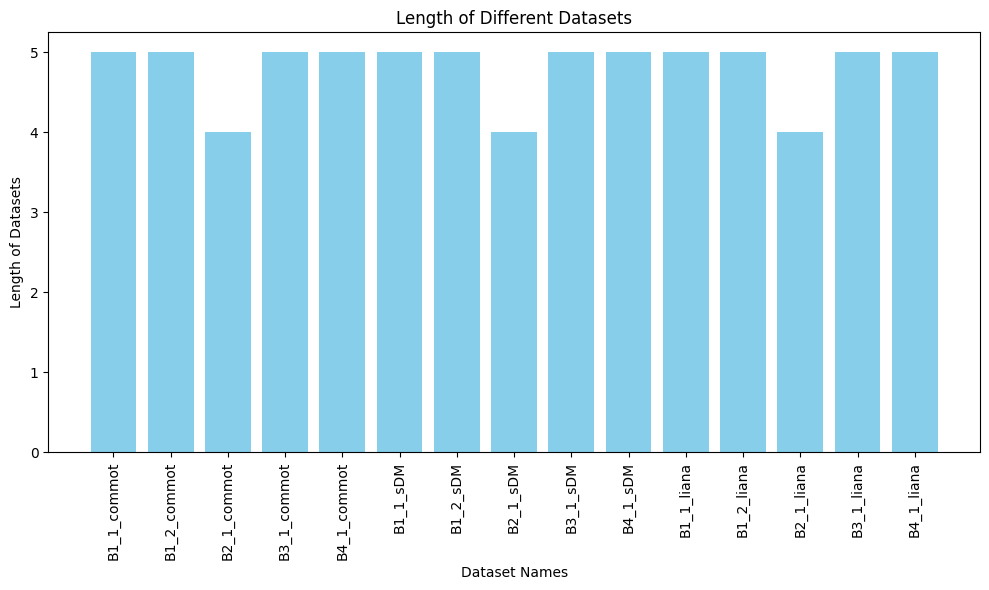

In [16]:
datasets = [B1_1_commot, B1_2_commot, B2_1_commot, B3_1_commot, B4_1_commot,
            B1_1_sDM, B1_2_sDM, B2_1_sDM, B3_1_sDM, B4_1_sDM,
            B1_1_liana, B1_2_liana, B2_1_liana, B3_1_liana, B4_1_liana]

# Calculate lengths of each dataset
lengths = [len(d) for d in datasets]

# Corresponding dataset names
dataset_names = [
    'B1_1_commot', 'B1_2_commot', 'B2_1_commot', 'B3_1_commot', 'B4_1_commot',
    'B1_1_sDM', 'B1_2_sDM', 'B2_1_sDM', 'B3_1_sDM', 'B4_1_sDM', 
    'B1_1_liana', 'B1_2_liana', 'B2_1_liana', 'B3_1_liana', 'B4_1_liana'
]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(dataset_names, lengths, color='skyblue')
plt.xlabel('Dataset Names')
plt.ylabel('Length of Datasets')
plt.title('Length of Different Datasets')
plt.xticks(rotation=90)
plt.tight_layout()

# Display plot
plt.show()

#### get the number of commot and select those from the other two methods

In [14]:
B1_1_liana = B1_1_liana[:len(B1_1_commot)]
B1_2_liana = B1_2_liana[:len(B1_2_commot)]
B2_1_commot = B2_1_commot[:len(B2_1_liana)]
B3_1_liana = B3_1_liana[:len(B3_1_commot)]
B4_1_liana = B4_1_liana[:len(B4_1_commot)]

In [15]:
B1_1_sDM = B1_1_sDM[:len(B1_1_commot)]
B1_2_sDM = B1_2_sDM[:len(B1_2_commot)]
B2_1_sDM = B2_1_sDM[:len(B2_1_liana)]
B3_1_sDM = B3_1_sDM[:len(B3_1_commot)]
B4_1_sDM = B4_1_sDM[:len(B4_1_commot)]

### Preparing the datasets together

In [24]:
#L1_1_commot, L1_2_commot, L2_1_commot
#L1_1_sDM, L1_2_sDM, L2_1_sDM, L3_1_sDM, L4_1_sDM
# L1_1_liana L1_2_liana L2_1_liana L3_1_liana L4_1_liana

dataset = [
    'B1_1_commot', 'B1_2_commot', 'B2_1_commot', 'B3_1_commot','B4_1_commot',
    'B1_1_sDM', 'B1_2_sDM', 'B2_1_sDM', 
    'B3_1_sDM', 'B4_1_sDM', 'B1_1_liana', 
    'B1_2_liana', 'B2_1_liana', 'B3_1_liana', 
    'B4_1_liana'
]

In [25]:
#Creating a dictionnary for all the lists ... 
dic_sig_path = {}

for data in dataset:
    dic_sig_path[data] = globals()[data]

# Print the dictionary to verify
dic_sig_path.keys()

dict_keys(['B1_1_commot', 'B1_2_commot', 'B2_1_commot', 'B3_1_commot', 'B4_1_commot', 'B1_1_sDM', 'B1_2_sDM', 'B2_1_sDM', 'B3_1_sDM', 'B4_1_sDM', 'B1_1_liana', 'B1_2_liana', 'B2_1_liana', 'B3_1_liana', 'B4_1_liana'])

#### Cleaning the gene pathways 

In [26]:
replacements = {
    'AREG-EGFR_ERBB2': 'AREG-EGFR-ERBB2',
    'AREG-EGFR': 'AREG-EGFR-ERBB2',
    'EGF-EGFR_ERBB2': 'EGF-EGFR-ERBB2',
    'EREG-EGFR_ERBB2': 'EREG-EGFR-ERBB2'
}

In [27]:
for key in dic_sig_path:
    dic_sig_path[key] = [replacements.get(item, item) for item in dic_sig_path[key]]

#### Removing duplicates in each gene set

In [28]:
for key in dic_sig_path:
    seen = set()
    new_list = []
    for item in dic_sig_path[key]:
        if item not in seen:
            seen.add(item)
            new_list.append(item)
    dic_sig_path[key] = new_list

### Heatmap

Precleaning the gene lists : 
- Check Row labels for similar gene paths
- In the geen lists remove x to be replaced by the more common y
- Remove duplicates of y 

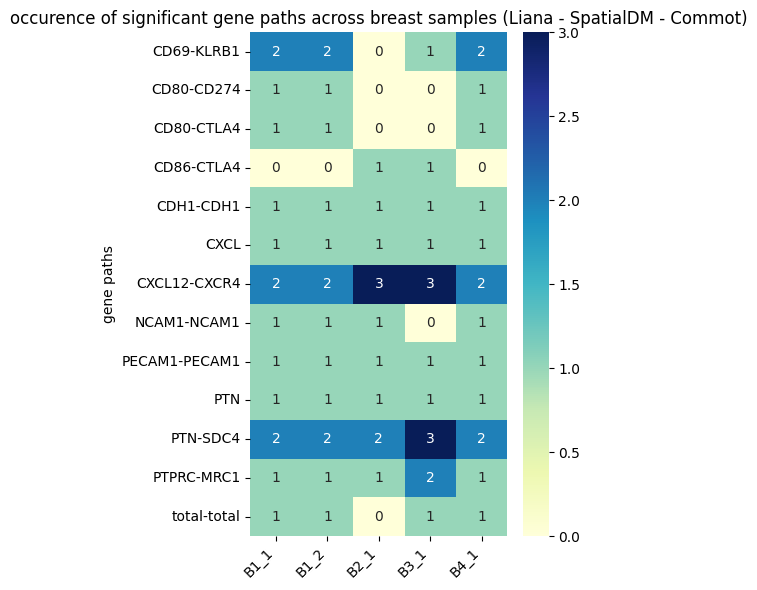

In [33]:
#Retrieve the gene paths
B1_1_gene = dic_sig_path['B1_1_commot'] + dic_sig_path['B1_1_sDM'] + dic_sig_path['B1_1_liana']
B1_2_gene = dic_sig_path['B1_2_commot'] + dic_sig_path['B1_2_sDM'] + dic_sig_path['B1_2_liana']
B2_1_gene = dic_sig_path['B2_1_commot'] + dic_sig_path['B2_1_sDM'] + dic_sig_path['B2_1_liana']
B3_1_gene = dic_sig_path['B3_1_commot'] + dic_sig_path['B3_1_sDM'] + dic_sig_path['B3_1_liana']
B4_1_gene = dic_sig_path['B3_1_commot'] + dic_sig_path['B4_1_sDM'] + dic_sig_path['B4_1_liana']

# Define the lists
lists = [B1_1_gene, B1_2_gene, B2_1_gene, B3_1_gene, B4_1_gene]

lists_as_string = ['B1_1', 'B1_2', 'B2_1', 'B3_1', 'B4_1' ]

# Count occurrences of each string in each list
occurrences = {}
for i, lst in enumerate(lists, start=1):
    for item in lst:
        label = item
        occurrences[(label, f'List{i}')] = occurrences.get((label, f'List{i}'), 0) + 1

# Convert occurrences to a matrix
matrix = []
row_labels = sorted(set([item[0] for item in occurrences.keys()]))
col_labels = [f'List{i+1}' for i in range(len(lists))]

for label in row_labels:
    row = []
    for lst in lists:
        count = occurrences.get((label, f'List{lists.index(lst) + 1}'), 0)
        row.append(count)
    matrix.append(row)

# Create a heatmap
plt.figure(figsize=(5, 6))  # Adjust the size of the figure
sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=lists_as_string, yticklabels=row_labels)
plt.ylabel("gene paths")
plt.title("occurence of significant gene paths across breast samples (Liana - SpatialDM - Commot)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Plotting the distribution of the genes 

In [23]:
# Check out what these genes look like 
#l1_1_gene

#Retreive these genes 

#### Jaccard index 

In [35]:
keys = [
    'B1_1_liana','B1_2_liana','B2_1_liana','B3_1_liana', 'B4_1_liana',
    'B1_1_sDM','B1_2_sDM','B2_1_sDM','B3_1_sDM', 'B4_1_sDM',
    'B1_1_commot',
    'B1_2_commot',
    'B2_1_commot',
    'B3_1_commot',
    'B4_1_commot'

]

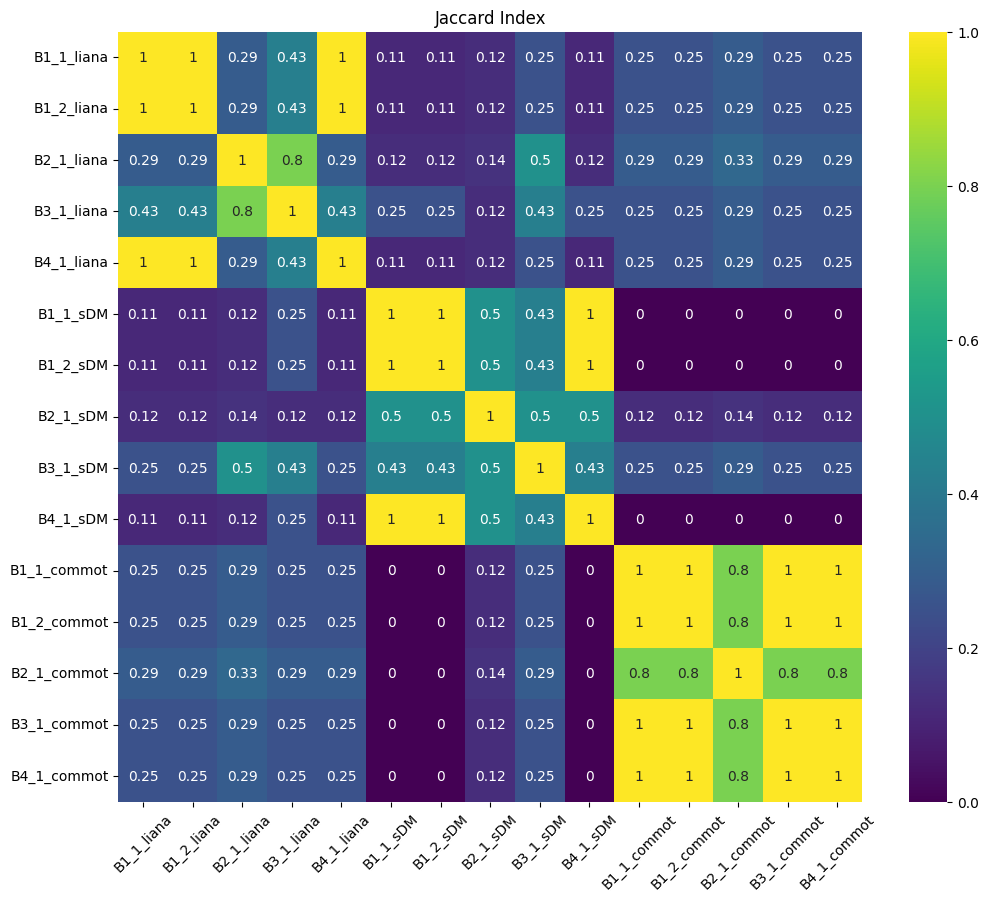

In [36]:
def jaccard_index(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# Initialize the matrix to store Jaccard indices
size = len(keys)
jaccard_matrix = np.zeros((size, size))

# Calculate Jaccard indices for each pair and fill the matrix
for i in range(size):
    for j in range(size):
        if i != j:  # Jaccard index of a list with itself is 1 (optional to fill)
            jaccard_matrix[i][j] = jaccard_index(dic_sig_path[keys[i]], dic_sig_path[keys[j]])
        else:
            jaccard_matrix[i][j] = 1  # Diagonal values (self similarity)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_matrix, xticklabels=keys, yticklabels=keys, annot=True, cmap='viridis')

plt.title('Jaccard Index')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Testing similarity between rows of the Jaccard index 

In [68]:
jaccard_heatmap = jaccard_matrix

In [73]:
jaccard_heatmap[0]

array([1.        , 0.94117647, 0.7037037 , 0.87272727, 0.57627119,
       0.50793651, 0.52380952, 0.43478261, 0.59375   , 0.43076923,
       0.34722222, 0.34246575, 0.3164557 ])

In [79]:
import numpy as np
from scipy.stats import permutation_test

# Assuming jaccard_heatmap is your Jaccard heatmap represented as a numpy array
# rows i and j are the rows you want to compare

row_i = jaccard_heatmap[0]
row_j = jaccard_heatmap[1]

# Define a test statistic (e.g., mean difference)
def test_statistic(row1, row2):
    return np.mean(row1) - np.mean(row2)

### Simple comparision of the mean 

#### a. replicates VS non replicates

In [ ]:
row1 = jaccard_heatmap[0]
row2 = jaccard_heatmap[1]

In [ ]:
test_statistic()

#### b. commot other, Liana vs others, 

In [92]:
def average_distance_to_one(numbers):
    sum_distance = sum(abs(1 - num) for num in numbers)
    
    # Calculate the average distance
    avg_distance = sum_distance / len(numbers)
    
    return avg_distance

In [97]:
# Example usage:
numbers = [0.87, 0.89]
avg_dist = average_distance_to_one(numbers)
print("Average Distance to 1:", avg_dist)

Average Distance to 1: 0.12


### Comparision using a permutation test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html